In [218]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

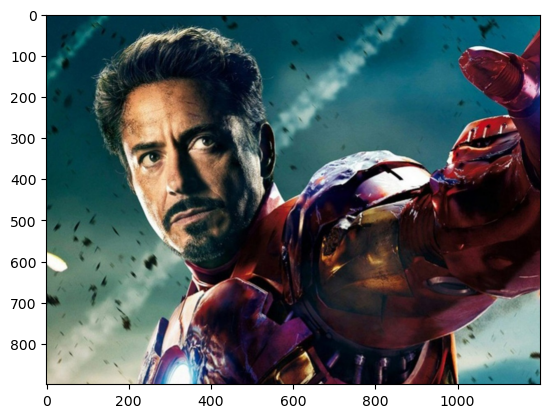

In [219]:
def read_file(file):
    oImg = cv.imread(file)
    oImg = cv.cvtColor(oImg, cv.COLOR_BGR2RGB)
#     cv.imshow("input image",img)
#     cv.waitKey(0) # Important to show the img
#     cv.destroyAllWindows()
    plt.imshow(oImg)
    plt.show()
    return oImg

oImg = read_file('image.png')

In [220]:
def edge_mask(img, line_size, blur_value):
    grayImg = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    GgrayBlurImg = cv.GaussianBlur(grayImg, (21, 21), blur_value)
    MgrayBlurImg = cv.medianBlur(grayImg, blur_value)
    BgrayBlurImg = cv.bilateralFilter(grayImg, 21, 21, blur_value)
    
    blurImgList = [GgrayBlurImg, MgrayBlurImg, BgrayBlurImg]
    edgesImgList = []
    for bImg in blurImgList:
        edgesImg = cv.adaptiveThreshold(bImg, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, line_size, 1)#>>blur_value)
        plt.imshow(edgesImg, cmap='gray')
        plt.show()
        edgesImgList.append(edgesImg)
                
    return edgesImgList
    
    

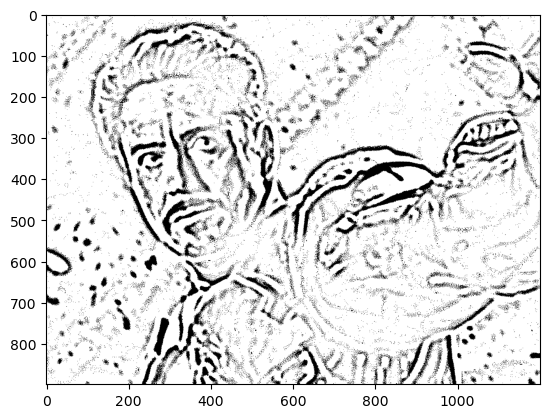

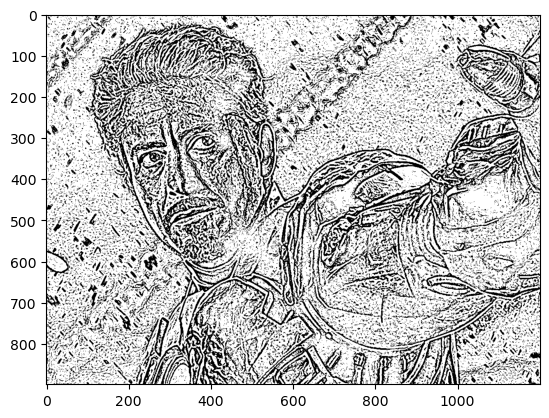

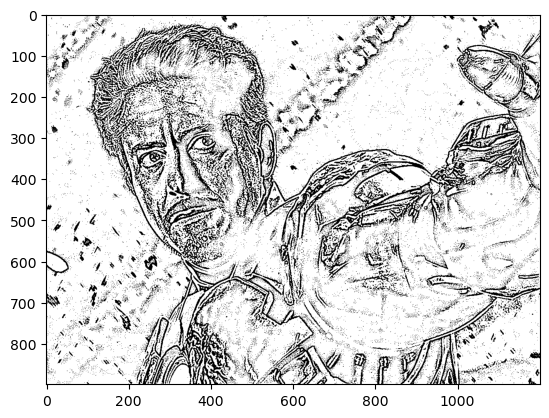

In [221]:
# img, line_size, blur_value = oImg, 11, 1 # Thickness of the drawing can be reduce wiht line_size but even ints are not supported
# edgesImgList = edge_mask(img, line_size, blur_value)

# This what i needed 👌
img, line_size, blur_value = oImg, 5, 5 # Thickness of the drawing can be reduce wiht line_size but even ints are not supported
edgesImgList = edge_mask(img, line_size, blur_value)

```
#Same thing but stored in Variable but giving different Value which causing 
#problem in plt.imshow(edgesImg, cmap='gray')

edgesImg = edgesImgList[0] # GaussianBlur

print('Value stored:--')
print('Variable List index value:',edgesImg)
print('Noraml List index value:',edgesImgList[0])
print("")
print('Length Comparision:--')
print('Variable List index value:',len(edgesImg))
print('Noraml List index value:',len(edgesImgList[0]))
```

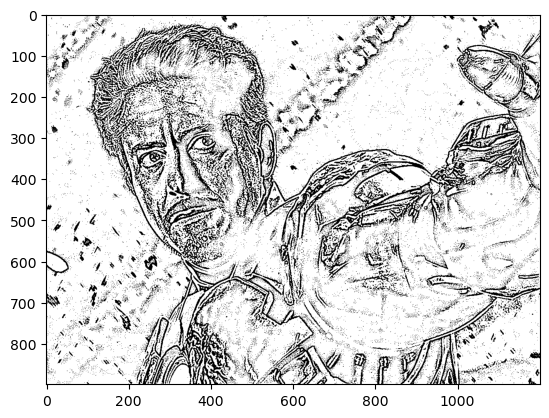

In [222]:
edgesImg = edgesImgList[2] # GaussianBlur-> bilateralFilter
plt.imshow(edgesImg, cmap='gray');

## Reducing color pallets using K-means Clustering

In [223]:
def color_quantization(img, kValue):
    data = np.float32(img).reshape((-1,3)) # Transforming the img
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 20, 0.001) # Determining criteria
    
    # K-Means Clustering
    ret, label, center = cv.kmeans(data, kValue, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS) # cv.KMEANS_PP_CENTERS shows same results but take more computational power
    center = np.uint8(center)
    
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    
    return result

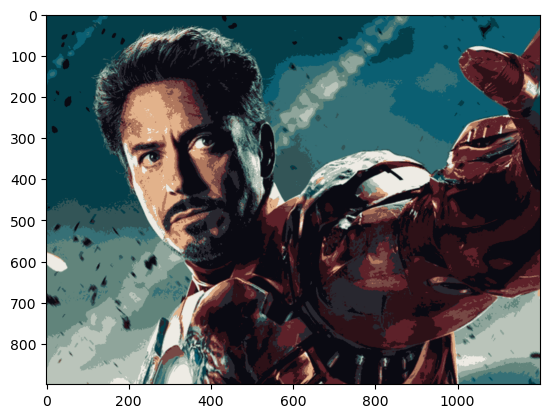

In [224]:
quantizedImg = color_quantization(oImg, 15)
plt.imshow(quantizedImg); # Damn It's looking good, but ya its taking time

## Merging edge_mask and color_quantization

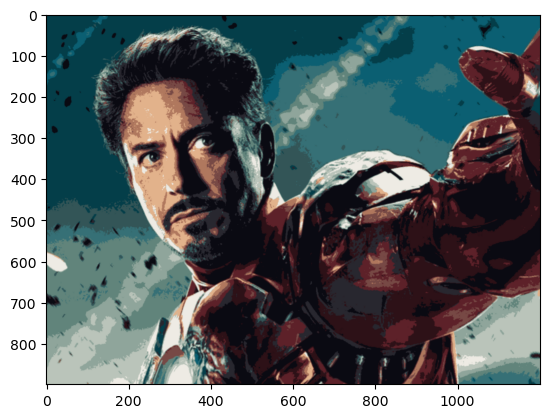

In [225]:
# (Opptional) Reducing the noise, but OK
lowerNoiseImg = cv.bilateralFilter(quantizedImg, d=1, sigmaColor=200, sigmaSpace=200) # d= Size of pixel(Creates smudge)
plt.imshow(lowerNoiseImg);

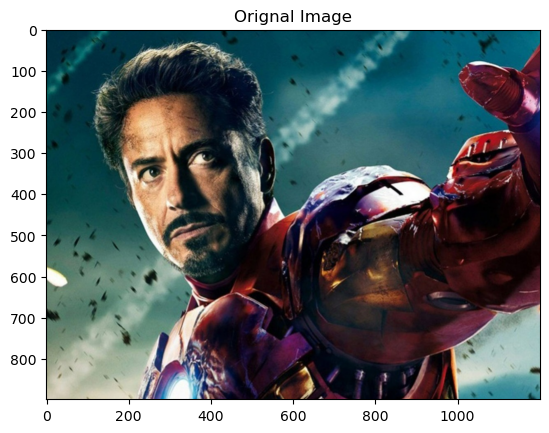

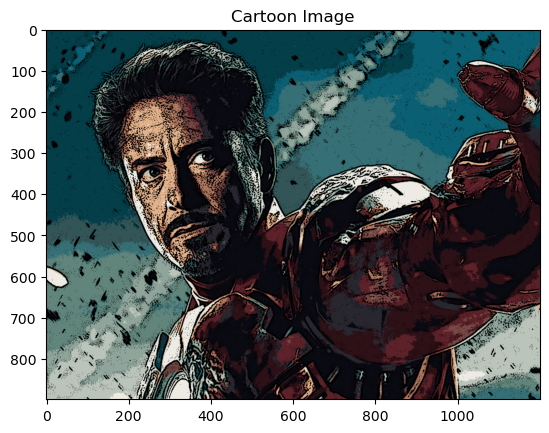

In [226]:
def cartoon_img():
    cartoonImg = cv.bitwise_and(lowerNoiseImg, lowerNoiseImg, mask=edgesImg)

    plt.title("Orignal Image")
    plt.imshow(oImg);
    plt.show()
    
    plt.title("Cartoon Image")
    plt.imshow(cartoonImg);
    
cartoon_img()